In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import collections
import math

G = nx.read_edgelist("dependency-relations.csv", delimiter = ",", create_using=nx.DiGraph())

In [2]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 481
Number of edges: 1682
Average in degree:   3.4969
Average out degree:   3.4969


In [3]:
nx.is_strongly_connected(G)

False

In [4]:
nx.number_strongly_connected_components(G)

289

In [5]:
nx.is_weakly_connected(G)

True

In [6]:
nx.average_shortest_path_length(G) # distància mitja

2.2294871794871796

In [7]:
nx.is_semiconnected(G) # unilateralment conex

False

In [8]:
nx.number_weakly_connected_components(G)

1

#### Coeficients de clustering 

In [9]:
# Local
clustering = nx.clustering(G)
sortedList = sorted(clustering.items(), key=lambda x:x[1], reverse=True)
print(sortedList)

[('Anorov/PySocks', 1.0), ('michilu/python-functools32', 1.0), ('waylan/mkdocs-nature', 1.0), ('pytest-dev/pytest-metadata', 1.0), ('rbarrois/python-semanticversion', 0.75), ('saltstack/pytest-logging', 0.6), ('smarie/python-makefun', 0.5555555555555556), ('PyCQA/flake8-polyfill', 0.5), ('sphinx-doc/sphinx-testing', 0.5), ('cpburnz/python-path-specification', 0.5), ('tdi/sphinxcontrib-manpage', 0.5), ('rolandshoemaker/CommonMark-py', 0.5), ('pallets/itsdangerous', 0.5), ('kennethreitz-archive/clint', 0.5), ('willkg/pytest-wholenodeid', 0.5), ('sbadia/python-backports.ssl-match-hostname', 0.5), ('notnola/websocket-client', 0.5), ('aio-libs/sphinxcontrib-asyncio', 0.5), ('sphinx-doc/sphinxcontrib-htmlhelp', 0.5), ('sphinx-doc/sphinxcontrib-jsmath', 0.5), ('pytest-dev/pytest-asyncio', 0.5), ('zopefoundation/zope.event', 0.5), ('zopefoundation/zope.testing', 0.5), ('MagicStack/immutables', 0.5), ('MobileDynasty/pytest-env', 0.5), ('jupyterlab/jupyterlab', 0.5), ('holoviz/colorcet', 0.5), (

In [10]:
# Global
nx.transitivity(G)

0.07132718239886444

#### Exportació de la component gegant fórtament conexa

In [11]:
sccl = list(nx.strongly_connected_components(G))
bigComponent = max(sccl, key=len)
sg = nx.subgraph(G, bigComponent)
nx.write_edgelist(sg, "scc.csv", data=False, delimiter=",")

# Diametre de la component fórtament conexa
nx.diameter(sg)

13

In [12]:
print(nx.info(sg))

Name: 
Type: DiGraph
Number of nodes: 193
Number of edges: 777
Average in degree:   4.0259
Average out degree:   4.0259


#### Recorregut del camí més llarg possible (L'últim print mostra el camí més llarg)

In [13]:
def visiteNode(node, path, longestPath):
    nodeName = node.title()
    
    # Botam els cicles
    if any(nodeName in visitedNodeName for visitedNodeName in visitedNodes):
        return longestPath;

    visitedNodes.append(nodeName)
    path.append(nodeName)
    
    # Actualitza el camí més llarg
    if (len(path) > longestPath):
        longestPath = len(path)
        print(f"Camí més llarg possible trobat: {path}. Longitud: {len(path)}")

    for nodeNeighbor in G.neighbors(node):
        newPath = path.copy()
        branchLongestPath = visiteNode(nodeNeighbor, newPath, longestPath)
        if (branchLongestPath > longestPath):
            longestPath = branchLongestPath
            
    return longestPath

# Agafam les arrels
initialNodes = [n for n,d in G.in_degree() if d==0] 
testNode = initialNodes[0]

longestPath = 0
visitedNodes = []

for n in G.nodes:
    path = []
    branchLongestPath = visiteNode(n, path, longestPath)
    if (branchLongestPath > longestPath):
        longestPath = branchLongestPath


Camí més llarg possible trobat: ['Tensorflow/Tensorflow']. Longitud: 1
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications']. Longitud: 2
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications', 'H5Py/H5Py']. Longitud: 3
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications', 'Numpy/Numpy', 'Ipython/Ipython']. Longitud: 4
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications', 'Numpy/Numpy', 'Ipython/Ipython', 'Spyder-Ide/Docrepr']. Longitud: 5
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications', 'Numpy/Numpy', 'Ipython/Ipython', 'Spyder-Ide/Docrepr', 'Pallets/Jinja']. Longitud: 6
Camí més llarg possible trobat: ['Tensorflow/Tensorflow', 'Keras-Team/Keras-Applications', 'Numpy/Numpy', 'Ipython/Ipython', 'Spyder-Ide/Docrepr', 'Pallets/Jinja', 'Pallets/Markupsafe']. Longitud: 7
Camí més llarg possible trobat: ['

### Graf no dirigit subyacent

In [14]:
nonDirectedGraph = nx.read_edgelist("dependency-relations.csv", delimiter = ",")

# Punts de tall
ap = nx.articulation_points(nonDirectedGraph)
print(list(ap))

['pytest-dev/pytest-bdd', 'jquast/wcwidth', 'readthedocs/sphinx_rtd_theme', 'matplotlib/matplotlib', 'uimallik/pytest-randomly', 'joke2k/faker', 'ipython/ipykernel', 'datacamp/bash_kernel', 'santosjorge/cufflinks', 'onnx/tensorflow-onnx', 'dmlc/xgboost', 'imageio/imageio', 'jazzband/django-configurations', 'googleapis/google-auth-library-python', 'flask-restful/flask-restful', 'PyGithub/PyGithub', 'googleapis/google-api-python-client', 'googleapis/oauth2client', 'zekus/pytest-django', 'python-lz4/python-lz4', 'python-trio/sniffio', 'ionelmc/pytest-benchmark', 'dask/zict', 'ageron/handson-ml', 'bertsky/wrap_opencv-python-headless', 'eriklindernoren/ML-From-Scratch', 'plotly/plotly.py', 'holoviz/datashader', 'spatialaudio/nbsphinx', 'mwouts/jupytext', 'jupyter-widgets/ipyleaflet', 'scipy/scipy', 'neithere/argh', 'edmorley/sphinx-autobuild', 'mkdocs/mkdocs', 'mozilla/bleach', 'horovod/horovod', 'scrapy/parsel', 'readthedocs/sphinx-autoapi', 'gevent/gevent', 'scrapy/scrapy', 'behave/behave

In [15]:
# Arestes de tall
bridges = list(nx.bridges(nonDirectedGraph)) 
print(bridges)

[('tensorflow/tensorflow', 'keras-team/keras-preprocessing'), ('tensorflow/tensorflow', 'simonpercivall/astunparse'), ('tensorflow/tensorflow', 'google/flatbuffers'), ('tensorflow/tensorflow', 'serge-sans-paille/gast'), ('tensorflow/tensorflow', 'google/pasta'), ('numpy/numpy', 'pandas-dev/pydata-sphinx-theme'), ('ipython/ipython', 'KOLANICH/stack_data'), ('sphinx-doc/sphinx', 'sphinx-doc/sphinxcontrib-qthelp'), ('sphinx-doc/sphinx', 'sphinx-doc/sphinxcontrib-serializinghtml'), ('PyCQA/pylint', 'python/python-docs-theme'), ('pytest-dev/pytest', 'pallets/pallets-sphinx-themes'), ('pytest-dev/pytest', 'asottile/pygments-pytest'), ('pytest-dev/pytest', 'The-Compiler/pytest-xvfb'), ('pypa/setuptools', 'jaraco/jaraco.packaging'), ('pypa/setuptools', 'jaraco/rst.linker'), ('pypa/setuptools', 'asottile/flake8-2020'), ('pypa/setuptools', 'jaraco/jaraco.envs'), ('paver/paver', 'nedbat/cog'), ('flasgger/flasgger', 'marshmallow-code/apispec'), ('flasgger/flasgger', 'marshmallow-code/marshmallow')

In [16]:
clusteringNoDirigit = nx.clustering(nonDirectedGraph)
sortedListNd = sorted(clusteringNoDirigit.items(), key=lambda x:x[1], reverse=True)
print(sortedListNd)

[('PyCQA/flake8-polyfill', 1.0), ('sphinx-doc/sphinx-testing', 1.0), ('Anorov/PySocks', 1.0), ('cpburnz/python-path-specification', 1.0), ('michilu/python-functools32', 1.0), ('tdi/sphinxcontrib-manpage', 1.0), ('rolandshoemaker/CommonMark-py', 1.0), ('pallets/itsdangerous', 1.0), ('kennethreitz-archive/clint', 1.0), ('willkg/pytest-wholenodeid', 1.0), ('rbarrois/python-semanticversion', 1.0), ('sbadia/python-backports.ssl-match-hostname', 1.0), ('notnola/websocket-client', 1.0), ('aio-libs/sphinxcontrib-asyncio', 1.0), ('waylan/mkdocs-nature', 1.0), ('sphinx-doc/sphinxcontrib-htmlhelp', 1.0), ('sphinx-doc/sphinxcontrib-jsmath', 1.0), ('pytest-dev/pytest-asyncio', 1.0), ('zopefoundation/zope.event', 1.0), ('zopefoundation/zope.testing', 1.0), ('pytest-dev/pytest-metadata', 1.0), ('MagicStack/immutables', 1.0), ('MobileDynasty/pytest-env', 1.0), ('jupyterlab/jupyterlab', 1.0), ('holoviz/colorcet', 1.0), ('missinglinkelectronics/sphinxcontrib-svg2pdfconverter', 1.0), ('pitrou/pickle5-bac

In [17]:
nx.transitivity(nonDirectedGraph) # Coeficient de clustering global pel graf subyacent no dirigit

0.11085385313350646

## Centralitat

### Centrality degree

##### Un node es considera més important si té moltes llibreries que depenguin d'ell. A continuació se mostra el top 10 de llibreríes segons el seu grau de centralitat

In [18]:
degreeCentrality = nx.in_degree_centrality(G)
top10byDegree = sorted(degreeCentrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(top10byDegree)

[('pytest-dev/pytest', 0.20416666666666666), ('sphinx-doc/sphinx', 0.16875), ('benjaminp/six', 0.11666666666666667), ('nedbat/coveragepy', 0.075), ('pytest-dev/pytest-cov', 0.07083333333333333), ('pypa/setuptools', 0.06666666666666667), ('numpy/numpy', 0.058333333333333334), ('calvinchengx/python-mock', 0.058333333333333334), ('PyCQA/flake8', 0.05625), ('readthedocs/sphinx_rtd_theme', 0.05416666666666667)]


In [19]:
top10byDegree

[('pytest-dev/pytest', 0.20416666666666666),
 ('sphinx-doc/sphinx', 0.16875),
 ('benjaminp/six', 0.11666666666666667),
 ('nedbat/coveragepy', 0.075),
 ('pytest-dev/pytest-cov', 0.07083333333333333),
 ('pypa/setuptools', 0.06666666666666667),
 ('numpy/numpy', 0.058333333333333334),
 ('calvinchengx/python-mock', 0.058333333333333334),
 ('PyCQA/flake8', 0.05625),
 ('readthedocs/sphinx_rtd_theme', 0.05416666666666667)]

### Eigenvector Centrality

#### Un node es considerarà més important segons la importància dels seus veins

In [20]:
# For directed graphs this is “left” eigenvector centrality which corresponds to the in-edges in the graph
eigenCentrality = nx.eigenvector_centrality(G)
top10byEigenCentrality = sorted(eigenCentrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(top10byEigenCentrality)

[('pytest-dev/pytest', 0.4800845246883048), ('sphinx-doc/sphinx', 0.3730195970889729), ('pytest-dev/pytest-cov', 0.24190421419088018), ('nedbat/coveragepy', 0.18834472731527477), ('pypa/setuptools', 0.17801311666038816), ('bitprophet/alabaster', 0.14735333324720445), ('pygments/pygments', 0.14184213050704886), ('benjaminp/six', 0.1399171608582984), ('pypa/packaging', 0.1285585245272725), ('Cristie/wheel', 0.1282395840293831)]


#### Problema1: els nodes als que no apunta ningú no estan aportant importancia a l'algorisme (al principi varem veure que el graf no és fortament conex). A continuació veurem els nodes dels que ningú depén:

#### Problema 2: la importància que dona un node a altre no és proporcional al nombre de les seves relacions. Si un node està aportant importància molts de nodes, no se té en compte. No hi ha exclusivitat

In [21]:
rootNodes = [root for root in G.nodes if G.in_degree(root) == 0]
print(rootNodes)

['pytorch/pytorch', 'Unity-Technologies/ml-agents', 'ageron/handson-ml', 'horovod/horovod', 'eriklindernoren/ML-From-Scratch', 'josephmisiti/awesome-machine-learning', 'dmlc/xgboost']


#### Podem veure que alguna llibreria com Pytorch no està aportant importancia encara que és una llibreria important.

### PageRank Centrality

#### Arregla el problema 2 del Eigenvector. Un node distribueix la seva importancia segons l'exclusivitat

In [22]:
pageRankCentrality = nx.pagerank(G)
top10byPageRank = sorted(pageRankCentrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(top10byPageRank)

[('pytest-dev/pytest', 0.06532160412216985), ('sphinx-doc/sphinx', 0.037798189727802925), ('pypa/setuptools', 0.016011534179258505), ('nedbat/coveragepy', 0.014602807131663594), ('benjaminp/six', 0.014409691435408616), ('tox-dev/tox', 0.012482864929017554), ('pytest-dev/pytest-cov', 0.010963524932887865), ('jaraco/rst.linker', 0.010924461651373823), ('pygments/pygments', 0.009600213524150211), ('pytest-dev/pluggy', 0.008909758120945094)]


### Katz Centrality

In [23]:
katzCentrality = nx.katz_centrality(G)
top10byKatz = sorted(katzCentrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(top10byKatz)

[('pytest-dev/pytest', 0.4064999320500949), ('sphinx-doc/sphinx', 0.3544112949752952), ('pytest-dev/pytest-cov', 0.19378475577130788), ('benjaminp/six', 0.18284121564088077), ('pypa/setuptools', 0.17238862691160356), ('nedbat/coveragepy', 0.16974671994631657), ('pygments/pygments', 0.11495264241231948), ('psf/requests', 0.11403225061906766), ('PyCQA/flake8', 0.11120305827926623), ('calvinchengx/python-mock', 0.10823178226265347)]


### Betwenness Centrality

In [24]:
betwCentrality = nx.betweenness_centrality(G)
top10byBetw = sorted(betwCentrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(top10byBetw)

[('pytest-dev/pytest', 0.18421227626688705), ('sphinx-doc/sphinx', 0.12067164260464773), ('psf/requests', 0.07296216569046647), ('python-trio/pytest-trio', 0.06596922258764282), ('matplotlib/matplotlib', 0.06446717230277933), ('numpy/numpy', 0.06430776559853477), ('pygments/pygments', 0.06187024916078493), ('urllib3/urllib3', 0.060962149136799426), ('jupyter-widgets/ipywidgets', 0.051629827020363665), ('uimallik/pytest-randomly', 0.04785567245531386)]


# Plots

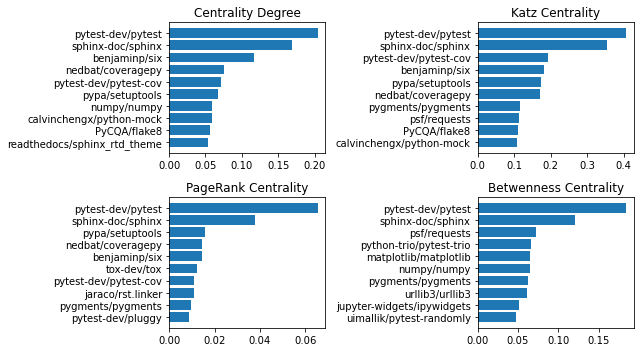

In [25]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(9, 5)

# Degree Graph Data
d_libraries = [librarieTuple[0] for librarieTuple in top10byDegree]
d_y_pos = np.arange(len(d_libraries))
d_degrees =  [librarieTuple[1] for librarieTuple in top10byDegree]
ax[0,0].barh(d_y_pos, d_degrees, align='center')
ax[0,0].set_yticks(d_y_pos)
ax[0,0].set_yticklabels(d_libraries)
ax[0,0].invert_yaxis()  # labels read top-to-bottom
ax[0,0].set_title('Centrality Degree')

# EigenVector Graph Data
#e_libraries = [librarieTuple[0] for librarieTuple in top10byEigenCentrality]
#e_y_pos = np.arange(len(e_libraries))
#e_degrees =  [librarieTuple[1] for librarieTuple in top10byEigenCentrality]
#ax[0,1].barh(e_y_pos, e_degrees, align='center')
#ax[0,1].set_yticks(e_y_pos)
#ax[0,1].set_yticklabels(e_libraries)
#ax[0,1].invert_yaxis()  # labels read top-to-bottom
#ax[0,1].set_title('Eigenvector Centrality')

# Page Rank Graph Data
p_libraries = [librarieTuple[0] for librarieTuple in top10byPageRank]
p_y_pos = np.arange(len(p_libraries))
p_degrees =  [librarieTuple[1] for librarieTuple in top10byPageRank]
ax[1,0].barh(p_y_pos, p_degrees, align='center')
ax[1,0].set_yticks(p_y_pos)
ax[1,0].set_yticklabels(p_libraries)
ax[1,0].invert_yaxis()  # labels read top-to-bottom
ax[1,0].set_title('PageRank Centrality')

# Katz Index Graph Data
k_libraries = [librarieTuple[0] for librarieTuple in top10byKatz]
k_y_pos = np.arange(len(k_libraries))
k_degrees =  [librarieTuple[1] for librarieTuple in top10byKatz]
ax[0,1].barh(k_y_pos, k_degrees, align='center')
ax[0,1].set_yticks(k_y_pos) # number of Y ticks
ax[0,1].set_yticklabels(k_libraries) # Y ticks
ax[0,1].invert_yaxis()  # labels read top-to-bottom
ax[0,1].set_title('Katz Centrality')

# Betweenness Graph Data
b_libraries = [librarieTuple[0] for librarieTuple in top10byBetw]
b_y_pos = np.arange(len(b_libraries))
b_degrees =  [librarieTuple[1] for librarieTuple in top10byBetw]
ax[1,1].barh(b_y_pos, b_degrees, align='center')
ax[1,1].set_yticks(b_y_pos) # number of Y ticks
ax[1,1].set_yticklabels(b_libraries) # Y ticks
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_title('Betwenness Centrality')

fig.tight_layout()
plt.rcdefaults()
plt.show()

## Distribució dels graus

#### Grau d'entrada

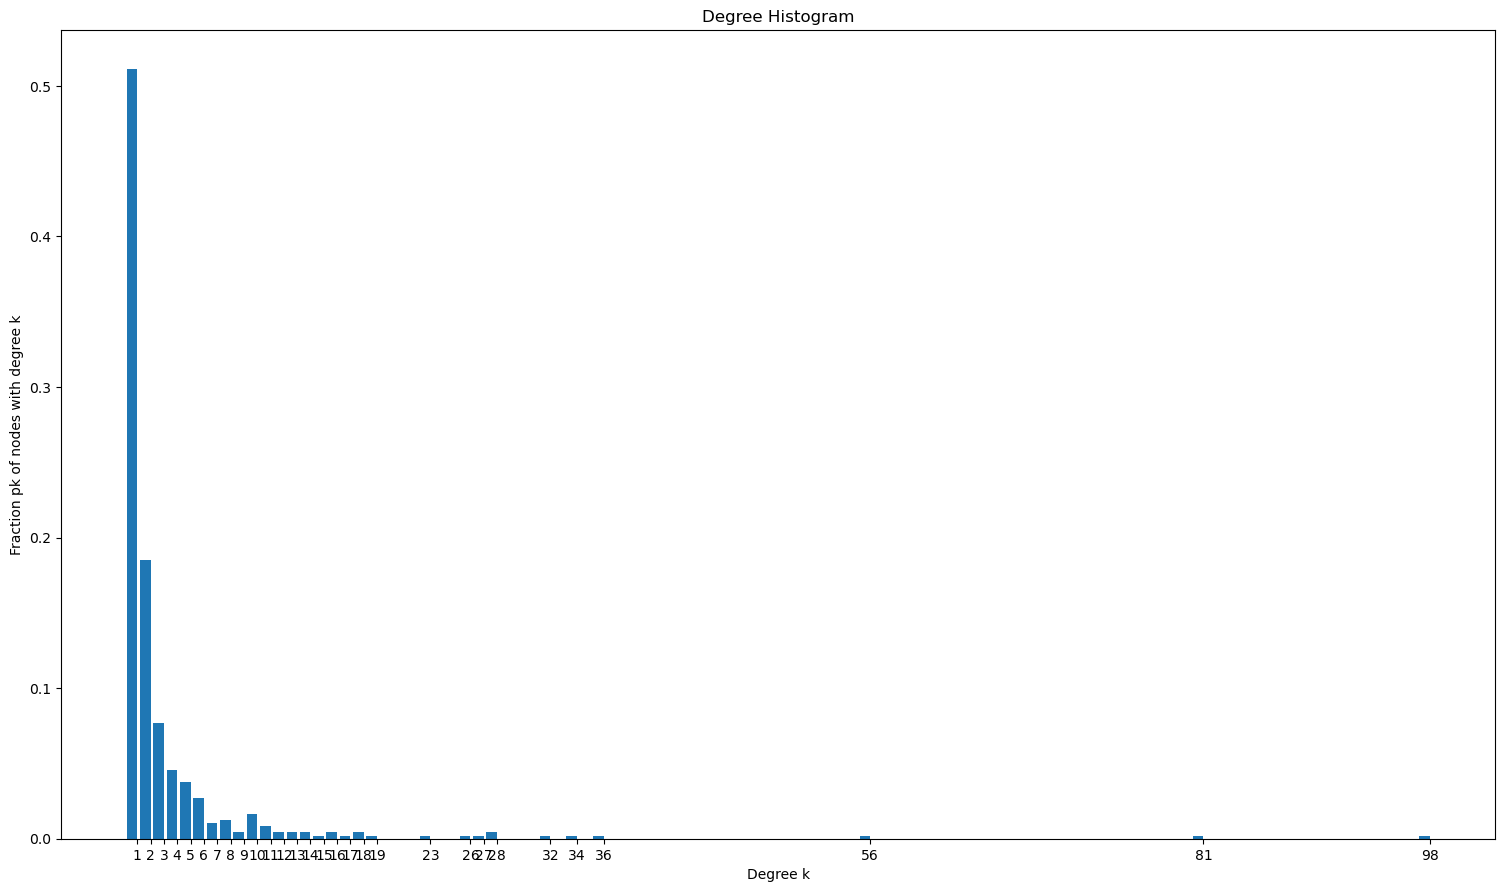

In [26]:
degree_sequence = sorted([d for n, d in G.in_degree() if d > 0], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [n / nx.number_of_nodes(G) for n in cnt]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.bar(deg, cnt, width=0.80)

plt.title("Degree Histogram")
plt.ylabel("Fraction pk of nodes with degree k")
plt.xlabel("Degree k")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

### És una Power law $\displaystyle{p_k = C k^{-\alpha}}$ 

#### C és una constant de normalització i $\alpha$ és l'exponent de la funció power law. Hem de calcular l'exponent de la funció: primer passam a representació logarítmica, d'aquesta manera podrem resoldre la següent ecuació:

$\displaystyle{\log p_k = -\alpha \log k + log C}$

#### La recta que forma el graf una vegada passat a representació logaritmica té una pendent $\alpha$, que sirà igual a l'exponent que cercam. Per agilitzar els càlculs hem emprat la llibreria https://github.com/jeffalstott/powerlaw (pip install powerlaw)

In [27]:
degree_sequence = sorted([d for n, d in G.in_degree() if d > 0], reverse=True)  # degree sequence

import powerlaw

<AxesSubplot:>

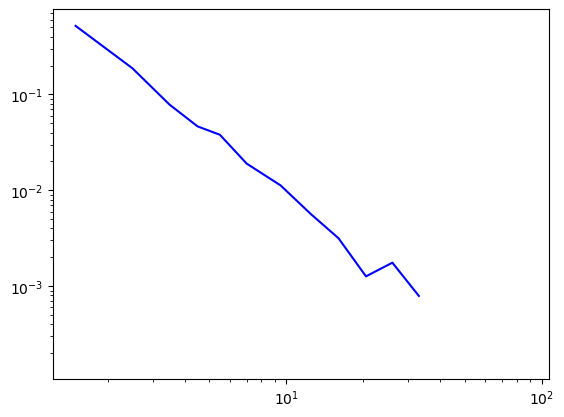

In [28]:
powerlaw.plot_pdf(degree_sequence, color='b')

##### Valor de alpha

In [29]:
fit = powerlaw.Fit(degree_sequence)
fit.power_law.alpha

Calculating best minimal value for power law fit
C:\Users\david.carretero\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


2.383919617714544

#### Grau de sortida

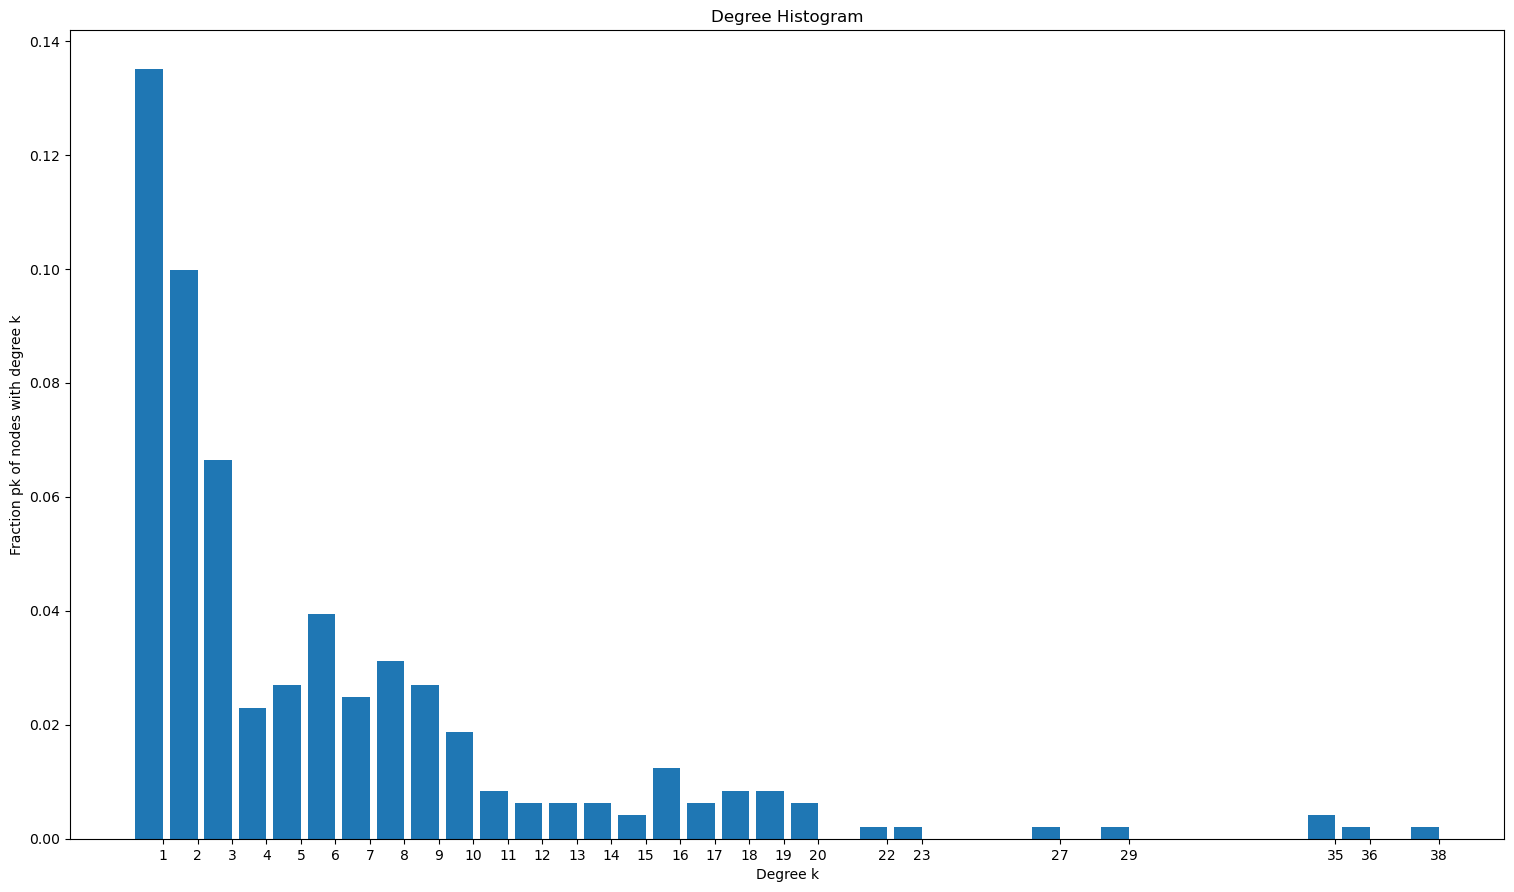

In [30]:
degree_sequence = sorted([d for n, d in G.out_degree() if d > 0], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [n / nx.number_of_nodes(G) for n in cnt]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plt.bar(deg, cnt, width=0.80)

plt.title("Degree Histogram")
plt.ylabel("Fraction pk of nodes with degree k")
plt.xlabel("Degree k")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

Calculating best minimal value for power law fit
C:\Users\david.carretero\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


4.971294069144322

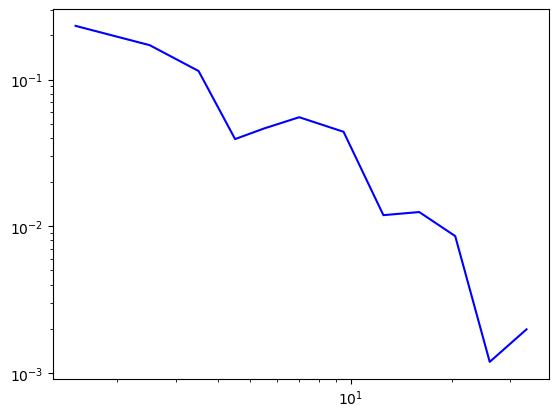

In [31]:
out_degree_sequence = sorted([d for n, d in G.out_degree() if d > 0], reverse=True)  # degree sequence

powerlaw.plot_pdf(out_degree_sequence, color='b')

fit2 = powerlaw.Fit(out_degree_sequence)
fit2.power_law.alpha